<a href="https://colab.research.google.com/github/gabrieladamasceno/Model_Attacks/blob/main/Heatmap_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io

In [91]:
df = '''
Modelo,Ataque Zero-Day,Accuracy,F1,Precision,Recall,Time,CPU,Memory,Energy,ZD - Accuracy,ZD - F1,ZD - Precision,ZD - Recall,ZD - Time,ZD - CPU,ZD - Memory,ZD - Energy
Decison Tree,tcp_ack,0.959482,0.977021,0.998296,0.956634,1.12926,9.53636,3633.9,7834.91,0.920823,0.958779,1,0.920823,1.11263,1.91818,3633.9,62.8215
Decison Tree,syn,0.967682,0.981765,0.997801,0.966237,1.13092,0.563636,3227,1.62001,0.994189,0.997086,1,0.994189,1.11602,0.672727,3227,2.71819
Decison Tree,icmp,0.960477,0.977571,0.999535,0.95655,1.13152,0.454545,3524.21,0.850124,0.656432,0.792585,1,0.656432,1.11103,0.554545,3524.21,1.51574
Decison Tree,slowloris,0.924218,0.956102,0.99922,0.91655,1.12984,1,3463.86,9.03868,0.202184,0.336362,1,0.202184,1.11124,0.345455,3463.86,0.366498
Decison Tree,udp,0.885081,0.931938,0.998369,0.873796,1.129,0.336364,3492.36,0.343726,0.330798,0.497142,1,0.330798,1.1134,0.672727,3492.36,2.71181
Decison Tree,ssh,0.957968,0.97612,0.999204,0.954079,1.13072,0.345455,3479.7,0.372922,0.0397511,0.0764628,1,0.0397511,1.11061,0.663636,3479.7,2.59681
Decison Tree,ftp,0.961327,0.978071,0.999197,0.957819,1.12938,0.454545,3527.72,0.848518,0.409747,0.581306,1,0.409747,1.01008,0.76,3527.72,3.5472
Decison Tree,portscan_tcp,0.955712,0.974818,0.998696,0.952056,1.12884,1.00909,3462.71,9.27929,0.806341,0.892789,1,0.806341,1.11155,0.663636,3462.71,2.59902
Decison Tree,os_fingerprinting,0.958186,0.976249,0.999093,0.954427,1.13138,0.672727,3513.31,2.7556,0.781122,0.877112,1,0.781122,1.11151,1.7,3513.31,43.6868
Decison Tree,portscan_udp,0.957789,0.976017,0.999153,0.953928,1.13103,0.681818,3525.75,2.86793,0.534895,0.696979,1,0.534895,1.11112,1.02727,3525.75,9.63623
Decison Tree,http_flood,0.96314,0.979122,0.999085,0.959942,1.13287,11.9455,3421.29,15448.1,0.999823,0.999911,1,0.999823,1.11188,0.672727,3421.29,2.70811
Decison Tree,dir_bruteforce,0.960292,0.977474,0.999011,0.956847,1.13072,0.672727,3523.35,2.75399,0.733007,0.845937,1,0.733007,1.11094,0.563636,3523.35,1.5914
Decison Tree,xss,0.962511,0.978754,0.999275,0.95906,1.13007,0.790909,3530.9,4.47274,0.252604,0.403326,1,0.252604,1.11038,0.681818,3530.9,2.81558
Decison Tree,sql_injection,0.962148,0.978545,0.999255,0.958676,1.13206,14.9,3664,29958.3,0.133929,0.23622,1,0.133929,1.11055,1,3664.01,8.88439
Random Forest,tcp_ack,0.96408,0.979669,0.998915,0.96115,2.47389,0.790909,3178.43,9.79151,0.968041,0.983761,1,0.968041,1.29887,1.11818,3178.43,14.5276
Random Forest,syn,0.966737,0.98121,0.998446,0.964558,2.44552,0.345455,2992.9,0.806555,0.994603,0.997294,1,0.994603,1.48162,11.9091,2992.91,20019.9
Random Forest,icmp,0.964419,0.979864,0.998942,0.961501,2.48539,0.9,3251.71,14.4948,0.709011,0.829732,1,0.709011,1.20561,0.690909,3251.71,3.18097
Random Forest,slowloris,0.943228,0.967479,0.999008,0.937879,2.50724,5.69091,3283.73,3696.84,0.508679,0.674337,1,0.508679,1.24739,1.01818,3283.73,10.5334
Random Forest,udp,0.952222,0.972771,0.999059,0.94783,2.45326,1.59091,3130.78,79.026,0.840251,0.913192,1,0.840251,1.34274,0.454545,3130.78,1.00882
Random Forest,ssh,0.96124,0.978027,0.998882,0.958026,2.44913,2.60909,3271.11,347.993,0.0248877,0.0485666,1,0.0248877,1.20238,11.0182,3271.11,12866.5
Random Forest,ftp,0.96533,0.980391,0.998883,0.962571,2.43054,1.01818,3361.38,20.5243,0.630325,0.773251,1,0.630325,1.08134,1,3361.38,8.65074
Random Forest,portscan_tcp,0.965704,0.980609,0.998747,0.963119,2.50142,9.48182,3261.02,17058.9,0.998031,0.999015,1,0.998031,1.23119,1.02727,3261.02,10.6775
Random Forest,os_fingerprinting,0.965034,0.98022,0.998896,0.962229,2.5267,8.63636,3284.95,13020.8,0.917822,0.95715,1,0.917822,1.2193,1.13636,3284.95,14.3137
Random Forest,portscan_udp,0.956324,0.975172,0.998828,0.95261,2.45669,1.01818,3353.57,20.7451,0.220962,0.361947,1,0.220962,1.19375,10.7636,3353.57,11909.1
Random Forest,http_flood,0.964141,0.979705,0.998895,0.961237,2.4977,0.681818,3178.27,6.33338,0.999823,0.999911,1,0.999823,1.24894,1.23636,3178.27,18.883
Random Forest,dir_bruteforce,0.953528,0.973543,0.99874,0.949586,2.47571,0.918182,3288.58,15.3312,0.255286,0.406737,1,0.255286,1.19555,1.25455,3288.58,18.885
Random Forest,xss,0.965127,0.980275,0.998813,0.962413,2.43502,0.781818,3333.65,9.30914,0.216146,0.35546,1,0.216146,1.17878,10.8,3333.65,11879.3
Random Forest,sql_injection,0.964918,0.980154,0.998863,0.962133,2.4444,0.681818,3353.18,6.19823,0.241071,0.388489,1,0.241071,1.18077,1.12727,3353.18,13.5314
Catboost,tcp_ack,0.96517,0.980297,0.99897,0.96231,2.6736,8.95455,3831.4,15357.4,0.968369,0.983931,1,0.968369,1.31817,1.34545,3674.03,25.6843
Catboost,syn,0.968468,0.982201,0.998695,0.966243,2.6513,0.781818,3637.86,10.136,0.994751,0.997369,1,0.994751,1.58955,0.681818,3442.87,4.03061
Catboost,icmp,0.965112,0.980264,0.998953,0.962262,2.66648,0.563636,3878.77,3.81966,0.724062,0.839949,1,0.724062,1.15576,0.9,3683.49,6.74038
Catboost,slowloris,0.929111,0.95906,0.99903,0.922165,2.64079,0.118182,3853,0.0348719,0.236216,0.38216,1,0.236216,1.22515,0.790909,3681.69,4.84909
Catboost,udp,0.881858,0.929842,0.999189,0.869496,2.60481,0.327273,3718.51,0.730459,0.301882,0.463762,1,0.301882,1.33749,1.15455,3563.42,16.4669
Catboost,ssh,0.964202,0.979739,0.998952,0.96125,2.64447,1.68182,3893.81,100.639,0.159696,0.27541,1,0.159696,1.13812,0.9,3713.68,6.63754
Catboost,ftp,0.96408,0.979668,0.998949,0.961118,2.65141,8.49091,3918.57,12984.6,0.405415,0.576933,1,0.405415,1.03571,0.63,3738.2,2.0718
Catboost,portscan_tcp,0.966444,0.981034,0.998815,0.963876,2.6306,2.24545,3879.43,238.264,0.997981,0.998989,1,0.997981,1.22832,11.2455,3695.79,13974.4
Catboost,os_fingerprinting,0.966186,0.980881,0.999068,0.963344,2.61776,1.34545,3893.02,51.0067,0.928065,0.962691,1,0.928065,1.19913,0.890909,3704.27,6.78356
Catboost,portscan_udp,0.964303,0.979799,0.998872,0.96144,2.64918,5.97273,3931.56,4515.64,0.833785,0.90936,1,0.833785,1.151,0.790909,3752.27,4.55561
Catboost,http_flood,0.966731,0.981201,0.998732,0.964275,2.6162,1.46364,3768.28,65.6237,0.999823,0.999911,1,0.999823,1.36546,1.57273,3613.22,42.4942
Catboost,dir_bruteforce,0.953177,0.973332,0.998956,0.94899,2.66392,10.3091,4061.19,23349.2,0.177529,0.301528,1,0.177529,1.15952,1.93636,3863.11,67.3486
Catboost,xss,0.966032,0.980795,0.998914,0.963321,2.6431,7.60909,3775.52,9315.41,0.197917,0.330435,1,0.197917,1.12767,1.14545,3577.63,13.5584
Catboost,sql_injection,0.965791,0.980655,0.998997,0.962974,2.69393,6.49091,3969.77,5893.76,0.107143,0.193548,1,0.107143,1.12157,1.34545,3789.91,21.8537
MLP,tcp_ack,0.94194,0.967007,0.990087,0.944979,16.2778,2.24545,3092.71,1474.34,0.947198,0.972883,1,0.947198,3.68212,9.49091,3050.69,25183.2
MLP,syn,0.957237,0.976022,0.985632,0.966598,16.617,2.15455,3112.93,1329.57,0.995156,0.997572,1,0.995156,6.18784,5.28182,3128.82,7294.23
MLP,icmp,0.941809,0.966924,0.990281,0.944644,16.7305,2.99091,3717.64,3581.03,0.613887,0.760756,1,0.613887,2.26286,1.59091,3424.45,72.8928
MLP,slowloris,0.947941,0.97058,0.988062,0.953706,16.5861,6,3571.81,28660.8,0.788213,0.881565,1,0.788213,2.82344,1.23636,3571.64,42.6881
MLP,udp,0.834623,0.89981,0.989867,0.824774,16.7358,3.19091,3740.83,4349.9,0.098835,0.179891,1,0.098835,4.01614,5.60909,3537.55,5669.91
MLP,ssh,0.950981,0.972305,0.989569,0.955632,16.6635,2.26364,3869.98,1546.24,0.428275,0.59971,1,0.428275,2.15329,0.781818,3869.31,8.23208
MLP,ftp,0.951019,0.972332,0.989377,0.955864,16.822,2.13636,4054.32,1312.18,0.586282,0.73919,1,0.586282,1.9566,3.85,3717.98,893.25
MLP,portscan_tcp,0.938288,0.964904,0.988779,0.942154,18.742,1.7,3849.89,736.635,0.749445,0.85678,1,0.749445,3.44641,11.4727,3849.9,41634.8
MLP,os_fingerprinting,0.940806,0.966361,0.989485,0.944293,16.9866,3.37273,3976.68,5213.64,0.729278,0.843448,1,0.729278,2.65098,12.5455,3779.27,41875.1
MLP,portscan_udp,0.951094,0.972404,0.988342,0.956972,16.5266,3.17273,4141.74,4222.52,0.725524,0.840932,1,0.725524,2.16341,1.02727,4141.74,18.7623
MLP,http_flood,0.955639,0.975072,0.986872,0.96355,16.7886,3.5,4022.48,5758.5,0.999823,0.999911,1,0.999823,4.23944,3.18182,3788.39,1092.51
MLP,dir_bruteforce,0.952678,0.973343,0.987586,0.959504,16.6498,1.27273,4246.88,274.603,0.998777,0.999388,1,0.998777,2.28239,1.35455,4247.78,45.3795
MLP,xss,0.953296,0.973696,0.987747,0.960039,16.5964,1.8,4296.52,774.319,0.257812,0.409938,1,0.257812,2.10088,0.9,3979.42,12.2523
MLP,sql_injection,0.953142,0.973601,0.987968,0.959646,16.5756,2.96364,4189.52,3451.71,0.14881,0.259067,1,0.14881,2.12566,12.5545,4189.73,33650.1
Autoencoder,tcp_ack,0.389443,0.506471,0.930398,0.347937,12.8355,2.24545,5494.71,1162.56,0.251453,0.401857,1,0.251453,3.03845,0.554545,5318.15,4.14527
Autoencoder,syn,0.282637,0.377641,0.86282,0.241719,13.2184,4.16364,5043.23,7632.87,0.21903,0.359351,1,0.21903,5.64942,0.454545,5101.15,4.2445
Autoencoder,icmp,0.390496,0.508469,0.928291,0.350124,13.5358,1.6,5460.18,443.542,0.0885009,0.162611,1,0.0885009,2.184,10.2091,5610.25,18591
Autoencoder,slowloris,0.428588,0.554236,0.930438,0.396349,13.3888,2.77273,5068.7,2941.05,0.898629,0.94657,1,0.898629,2.39686,1.47273,5068.7,28.8021
Autoencoder,udp,0.339241,0.44356,0.916892,0.292931,13.4144,2.26364,5109.97,1857.06,0.0768997,0.14251,1,0.0768997,2.25708,12.1273,5109.97,23537.1
Autoencoder,ssh,0.387932,0.506509,0.940428,0.344406,12.9157,1.80909,5162.77,750.811,0.413753,0.584759,1,0.413753,2.44111,1.15455,5162.77,14.659
Autoencoder,ftp,0.387948,0.505796,0.934898,0.344214,13.4916,1.48182,5378.17,314.288,0.28782,0.447545,1,0.28782,2.06213,0.890909,5378.17,10.2796
Autoencoder,portscan_tcp,0.359247,0.470068,0.923838,0.315053,13.2536,2.24545,5286.37,1844.7,0.686523,0.814545,1,0.686523,3.31327,1.13636,5286.37,17.4777
Autoencoder,os_fingerprinting,0.389657,0.508003,0.93006,0.34963,13.2435,4.72727,5322.84,9306.94,0.491321,0.658797,1,0.491321,2.06734,11.2364,5322.84,16630.9
Autoencoder,portscan_udp,0.388836,0.507425,0.92957,0.34842,13.292,1.38182,5366.5,236.467,0.134591,0.237303,1,0.134591,2.15814,1.7,5366.5,56.7329
Autoencoder,http_flood,0.384736,0.500584,0.923611,0.344381,13.4831,1.36364,5390.87,272.932,0.999823,0.999911,1,0.999823,2.15286,0.9,5390.87,10.1557
Autoencoder,dir_bruteforce,0.407949,0.528437,0.924823,0.370834,13.4357,3.16364,5612.92,4427.68,0.762615,0.865399,1,0.762615,2.16439,1.15455,5612.92,14.7391
Autoencoder,xss,0.39569,0.51525,0.929457,0.35712,13.2764,2.56364,5707.03,2308.85,0.170573,0.292683,1,0.170573,2.44521,0.454545,5707.03,4.25055
Autoencoder,sql_injection,0.395726,0.515297,0.928876,0.357212,13.3377,2.24545,5661.1,1850.56,0.133929,0.23622,1,0.133929,2.41165,1.7,5661.1,56.596'''

In [92]:
df = pd.read_csv(io.StringIO(df))

print("DataFrame")
print(df.head())

DataFrame
         Modelo Ataque Zero-Day  Accuracy        F1  Precision    Recall  \
0  Decison Tree         tcp_ack  0.959482  0.977021   0.998296  0.956634   
1  Decison Tree             syn  0.967682  0.981765   0.997801  0.966237   
2  Decison Tree            icmp  0.960477  0.977571   0.999535  0.956550   
3  Decison Tree       slowloris  0.924218  0.956102   0.999220  0.916550   
4  Decison Tree             udp  0.885081  0.931938   0.998369  0.873796   

      Time       CPU   Memory       Energy  ZD - Accuracy   ZD - F1  \
0  1.12926  9.536360  3633.90  7834.910000       0.920823  0.958779   
1  1.13092  0.563636  3227.00     1.620010       0.994189  0.997086   
2  1.13152  0.454545  3524.21     0.850124       0.656432  0.792585   
3  1.12984  1.000000  3463.86     9.038680       0.202184  0.336362   
4  1.12900  0.336364  3492.36     0.343726       0.330798  0.497142   

   ZD - Precision  ZD - Recall  ZD - Time  ZD - CPU  ZD - Memory  ZD - Energy  
0               1     0.92

In [93]:
attack_mapping = {
    'tcp_ack': 'TCP ACK',
    'syn': 'SYN',
    'icmp': 'ICMP',
    'slowloris': 'Slowloris',
    'udp': 'UDP',
    'ssh': 'SSH',
    'ftp': 'FTP',
    'portscan_tcp': 'TCP Port Scan',
    'os_fingerprinting': 'OS Fingerprinting',
    'portscan_udp': 'UDP Port Scan',
    'http_flood': 'HTTP Flood',
    'dir_bruteforce': 'Directory Brute Force',
    'xss': 'XSS',
    'sql_injection': 'SQL Injection'
}

df['Ataque Zero-Day'] = df['Ataque Zero-Day'].map(attack_mapping)

In [94]:
data_for_heatmap = df[['Modelo', 'Ataque Zero-Day', 'Accuracy', 'ZD - Accuracy']]
data_for_heatmap = data_for_heatmap.rename(columns={'ZD - Accuracy': 'Accuracy Zero-Day', 'Modelo': 'Model', 'Ataque Zero-Day': 'Attack Zero-Day'})

In [95]:
df_melted = data_for_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Accuracy', 'Accuracy Zero-Day'],
    var_name='Scenario',
    value_name='Accuracy Value'
)

df_pivot = df_melted.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Accuracy Value'
)



# Metrics

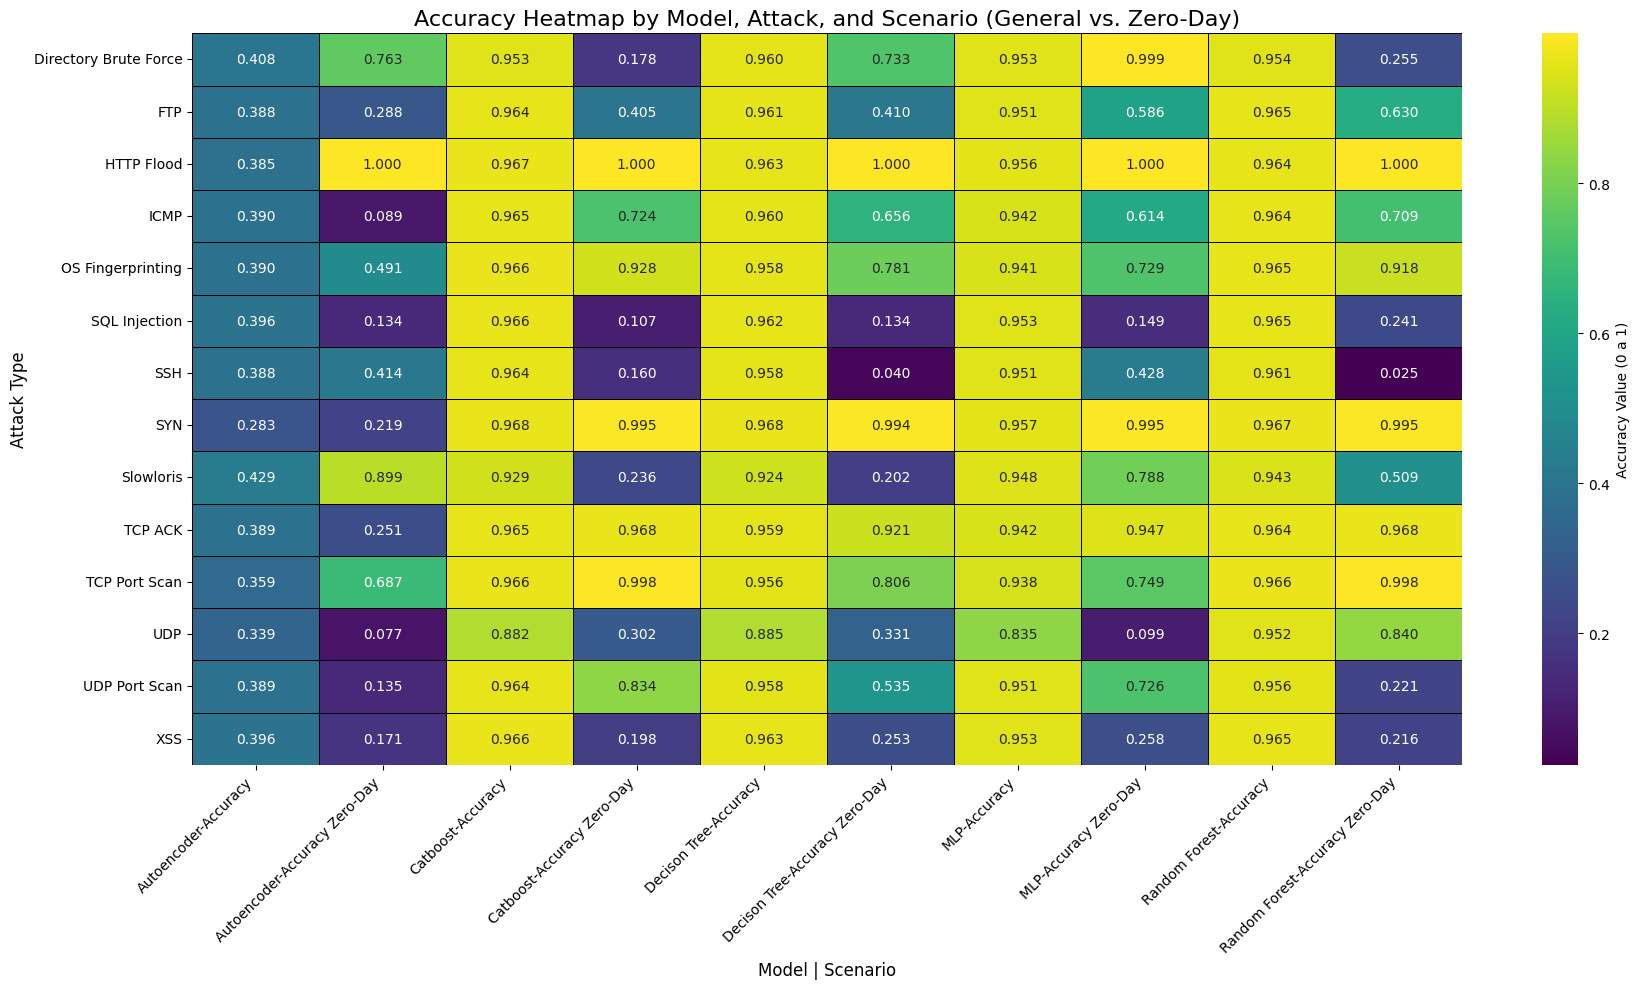

In [96]:
plt.figure(figsize=(18, 10))

sns.heatmap(
    df_pivot,
    annot=True,
    fmt=".3f",
    cmap="viridis",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Accuracy Value (0 a 1)'}
)

plt.title('Accuracy Heatmap by Model, Attack, and Scenario (General vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

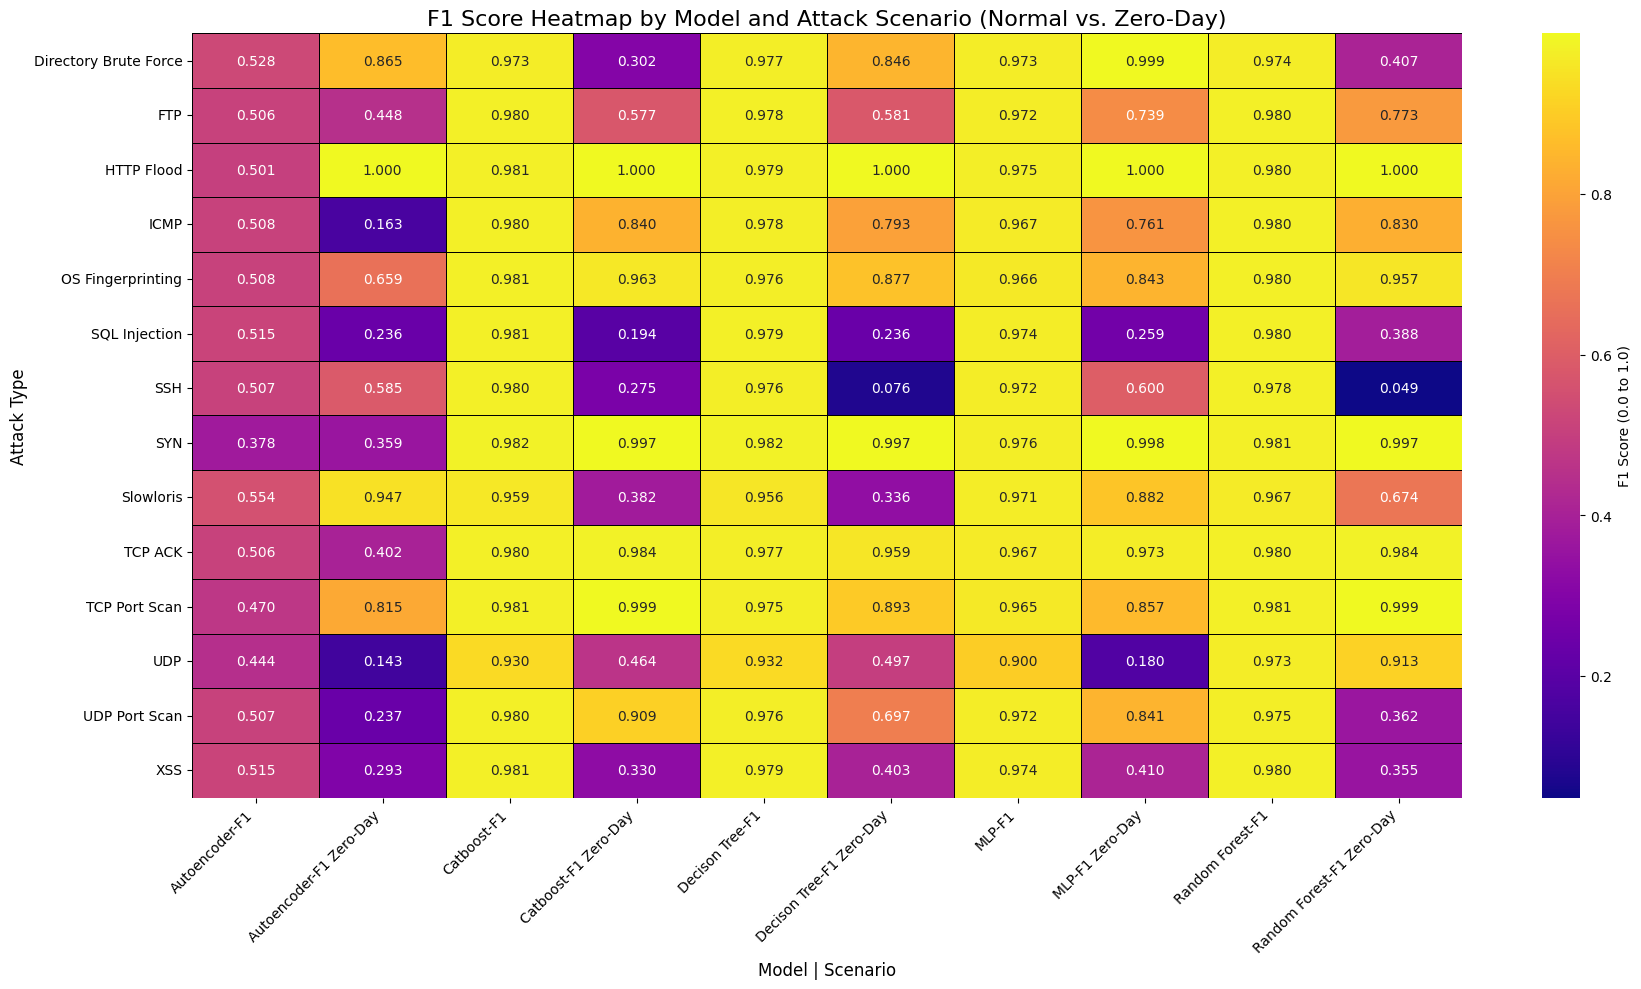

In [97]:
data_f1_heatmap = df[['Modelo', 'Ataque Zero-Day', 'F1', 'ZD - F1']].rename(columns={
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - F1': 'F1 Zero-Day', 'Modelo': 'Model'
})

df_melted_f1 = data_f1_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['F1', 'F1 Zero-Day'],
    var_name='Scenario',
    value_name='F1 Score'
)

df_pivot_f1 = df_melted_f1.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='F1 Score'
)

plt.figure(figsize=(18, 10))
sns.heatmap(
    df_pivot_f1,
    annot=True,
    fmt=".3f",
    cmap="plasma",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'F1 Score (0.0 to 1.0)'}
)

plt.title('F1 Score Heatmap by Model and Attack Scenario (Normal vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

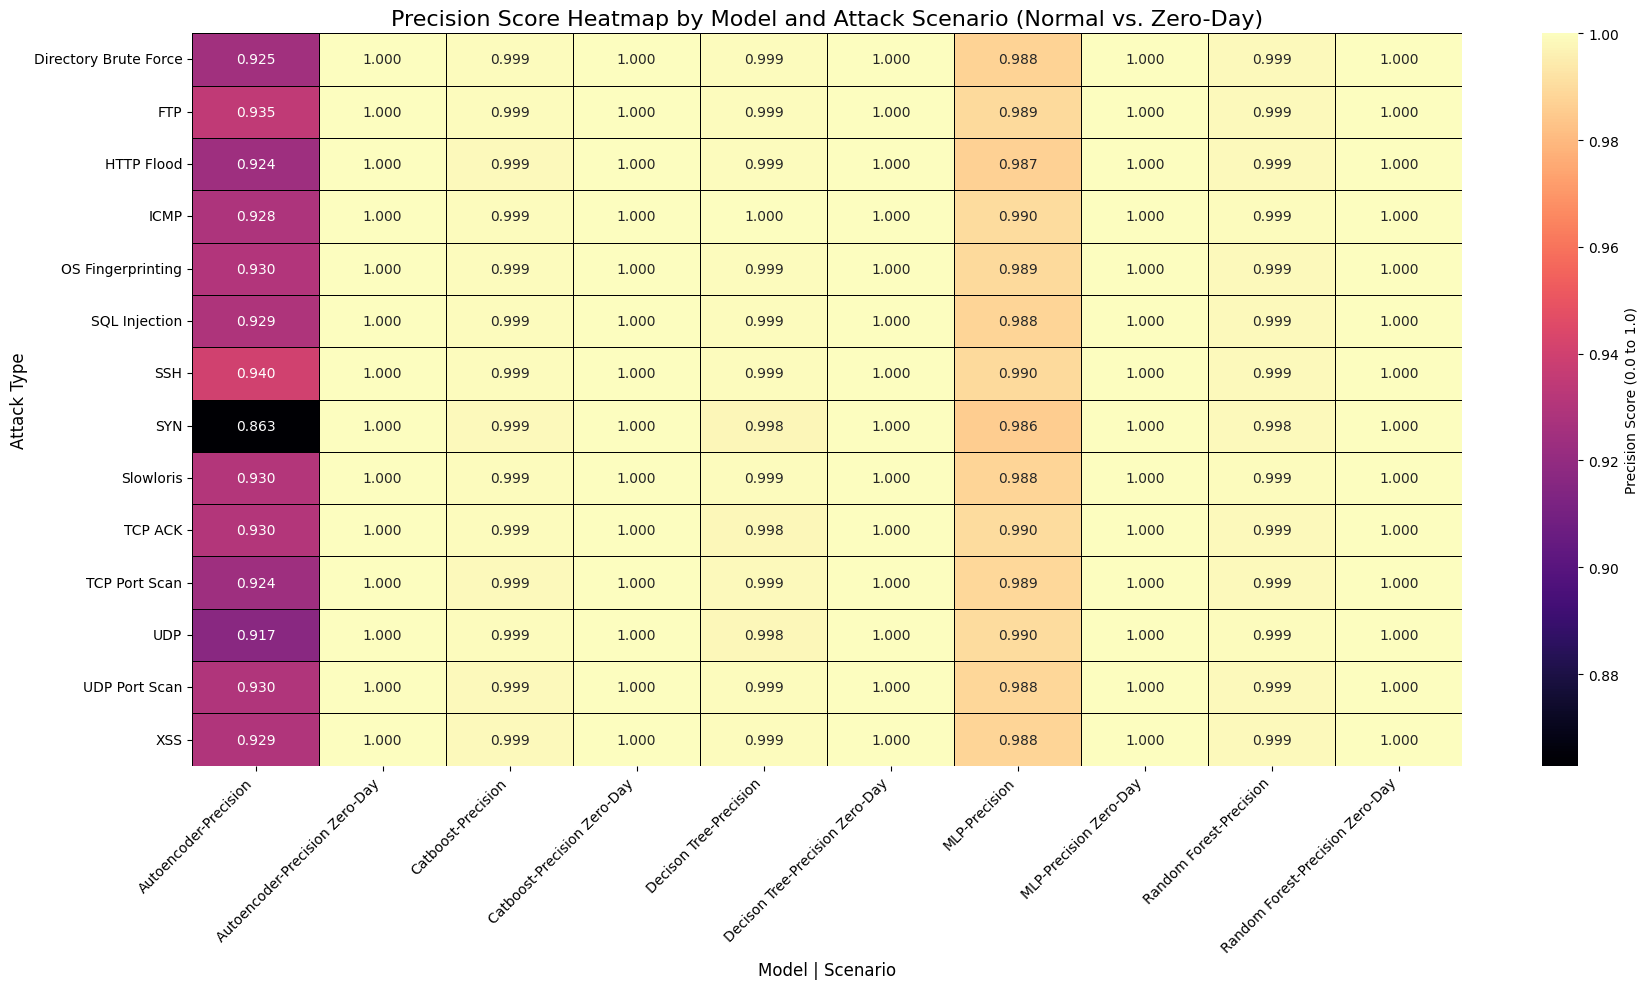

In [98]:
data_precision_heatmap = df[['Modelo', 'Ataque Zero-Day', 'Precision', 'ZD - Precision']].rename(columns={
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Precision': 'Precision Zero-Day','Modelo': 'Model'
})

df_melted_precision = data_precision_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Precision', 'Precision Zero-Day'],
    var_name='Scenario',
    value_name='Precision Score'
)

df_pivot_precision = df_melted_precision.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Precision Score'
)

plt.figure(figsize=(18, 10))
sns.heatmap(
    df_pivot_precision,
    annot=True,
    fmt=".3f",
    cmap="magma",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Precision Score (0.0 to 1.0)'}
)

plt.title('Precision Score Heatmap by Model and Attack Scenario (Normal vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

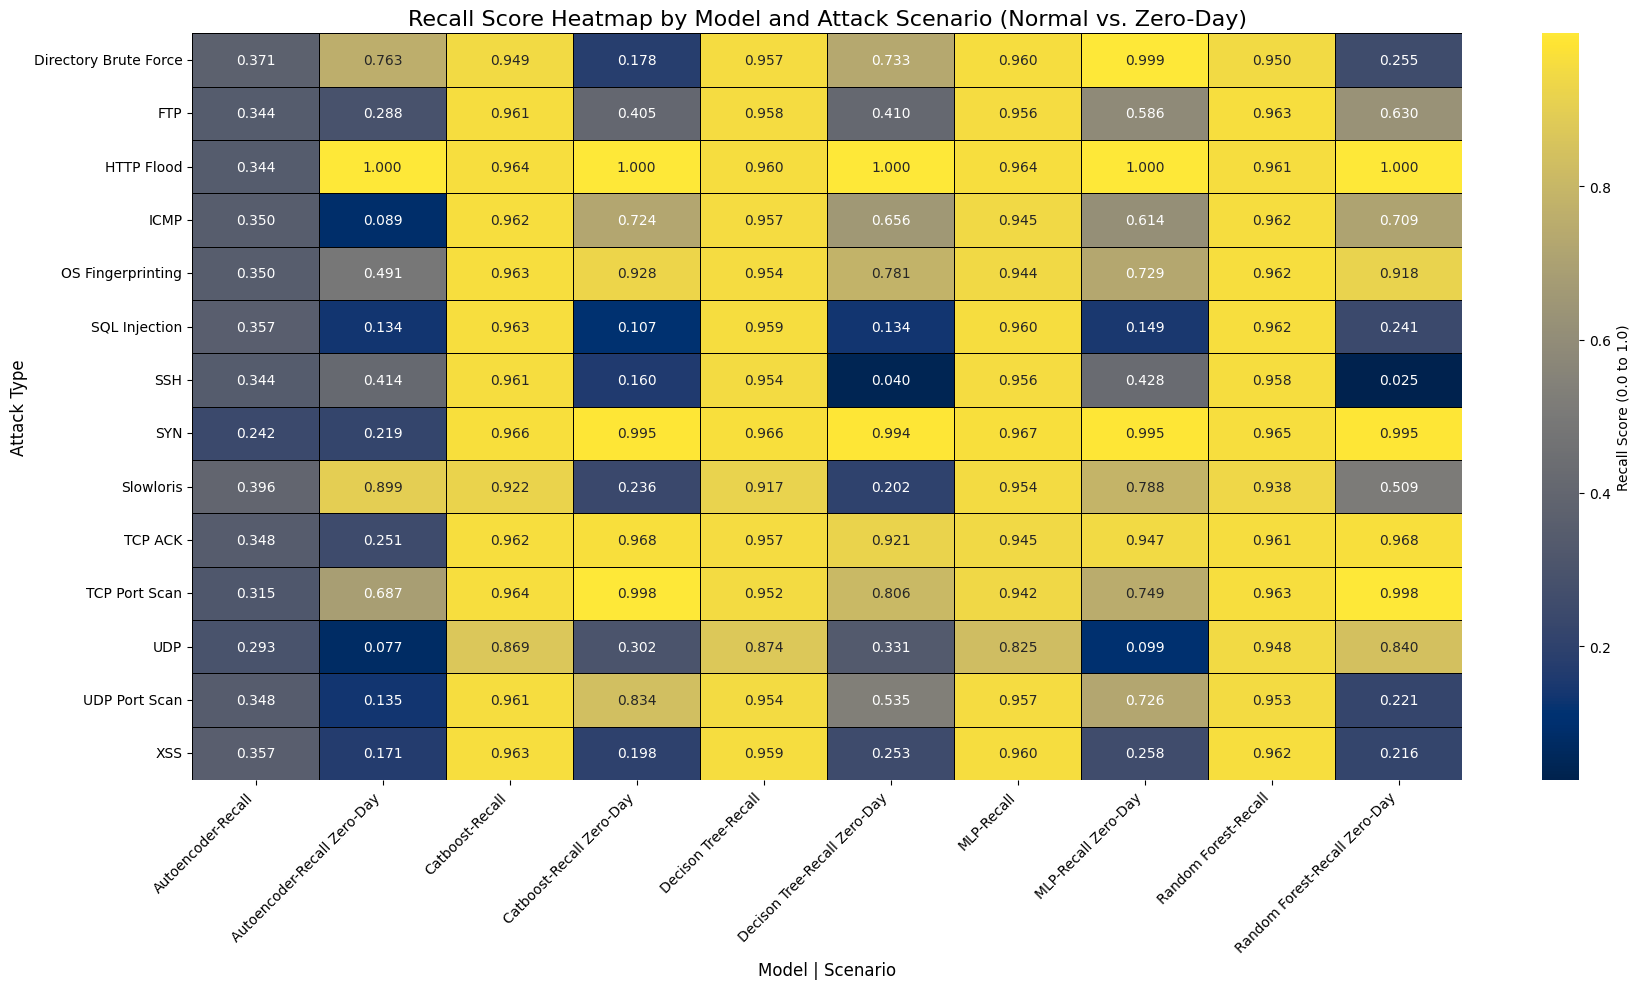

In [99]:
data_recall_heatmap = df[['Modelo', 'Ataque Zero-Day', 'Recall', 'ZD - Recall']].rename(columns={
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Recall': 'Recall Zero-Day','Modelo': 'Model'
})

df_melted_recall = data_recall_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Recall', 'Recall Zero-Day'],
    var_name='Scenario',
    value_name='Recall Score'
)

df_pivot_recall = df_melted_recall.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Recall Score'
)

plt.figure(figsize=(18, 10))
sns.heatmap(
    df_pivot_recall,
    annot=True,
    fmt=".3f",
    cmap="cividis",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Recall Score (0.0 to 1.0)'}
)

plt.title('Recall Score Heatmap by Model and Attack Scenario (Normal vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# CPU

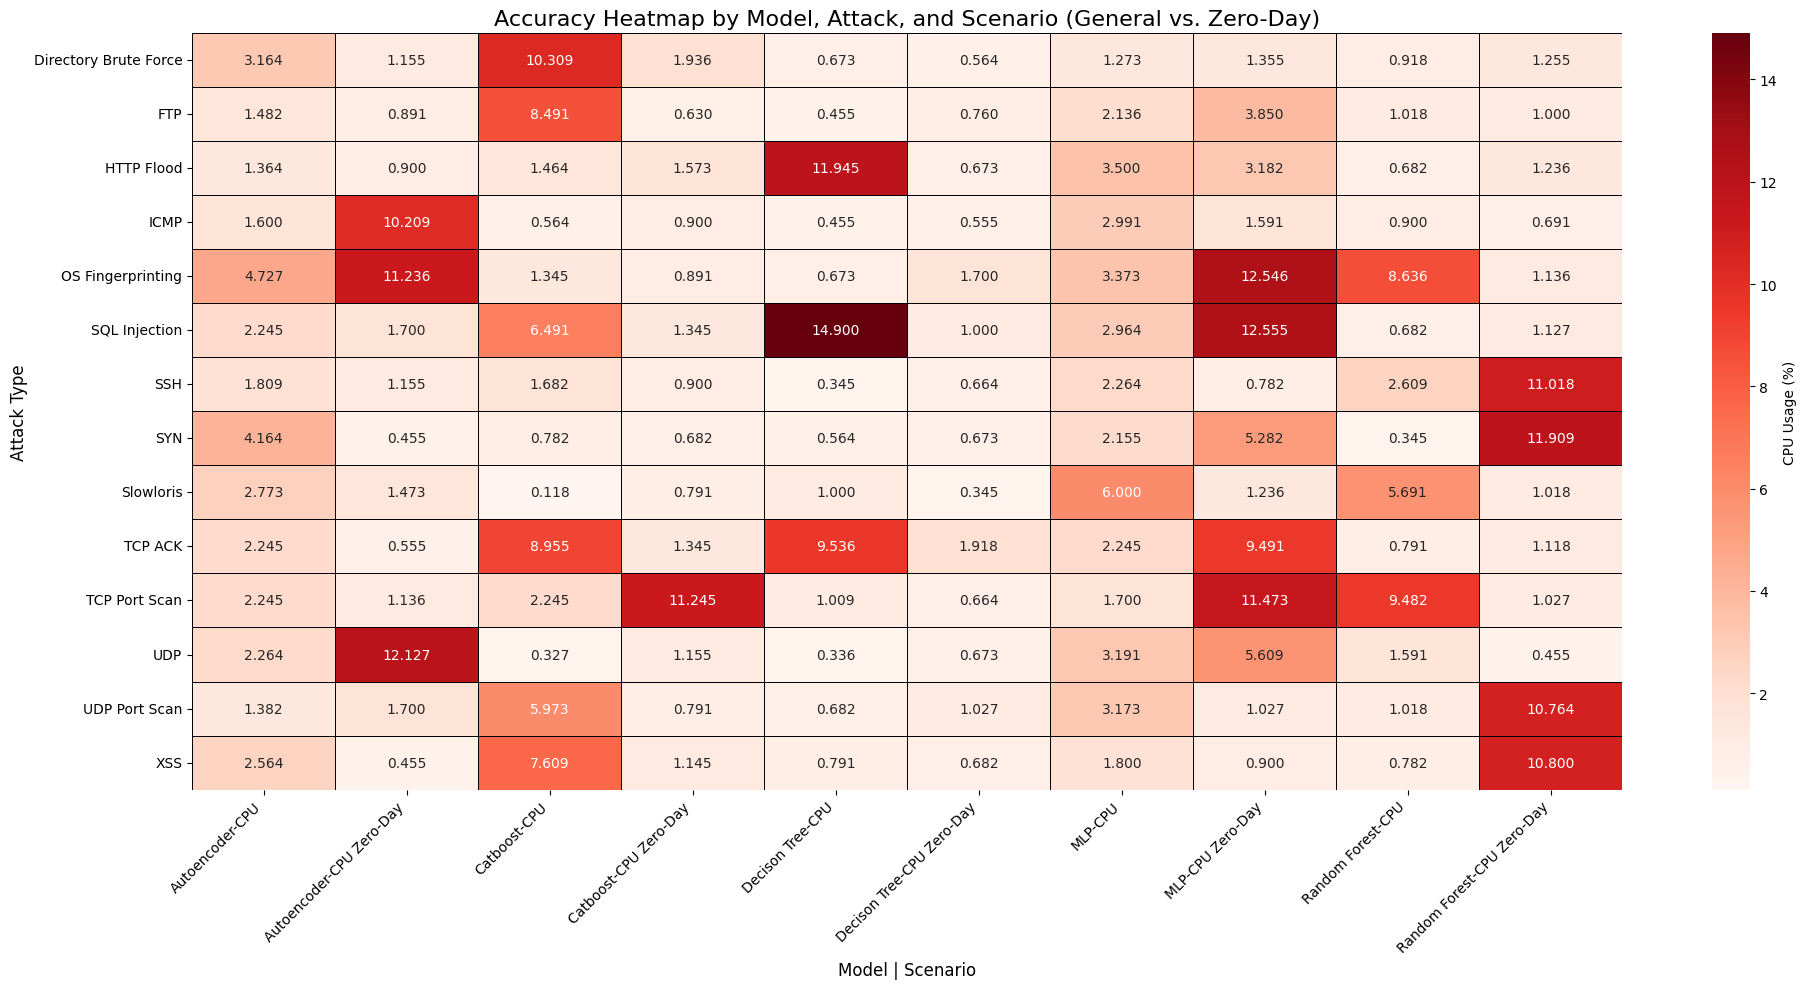

In [100]:
data_cpu_heatmap = df[['Modelo', 'Ataque Zero-Day', 'CPU', 'ZD - CPU']]
data_cpu_heatmap = data_cpu_heatmap.rename(columns={'ZD - CPU': 'CPU Zero-Day', 'Modelo': 'Model', 'Ataque Zero-Day': 'Attack Zero-Day'})

df_melted_cpu = data_cpu_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['CPU', 'CPU Zero-Day'],
    var_name='Scenario',
    value_name='Uso de CPU'
)

df_pivot_cpu = df_melted_cpu.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Uso de CPU'
)

plt.figure(figsize=(20, 10))

sns.heatmap(
    df_pivot_cpu,
    annot=True,
    fmt=".3f",
    cmap="Reds",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'CPU Usage (%)'}
)

plt.title('Accuracy Heatmap by Model, Attack, and Scenario (General vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Memory

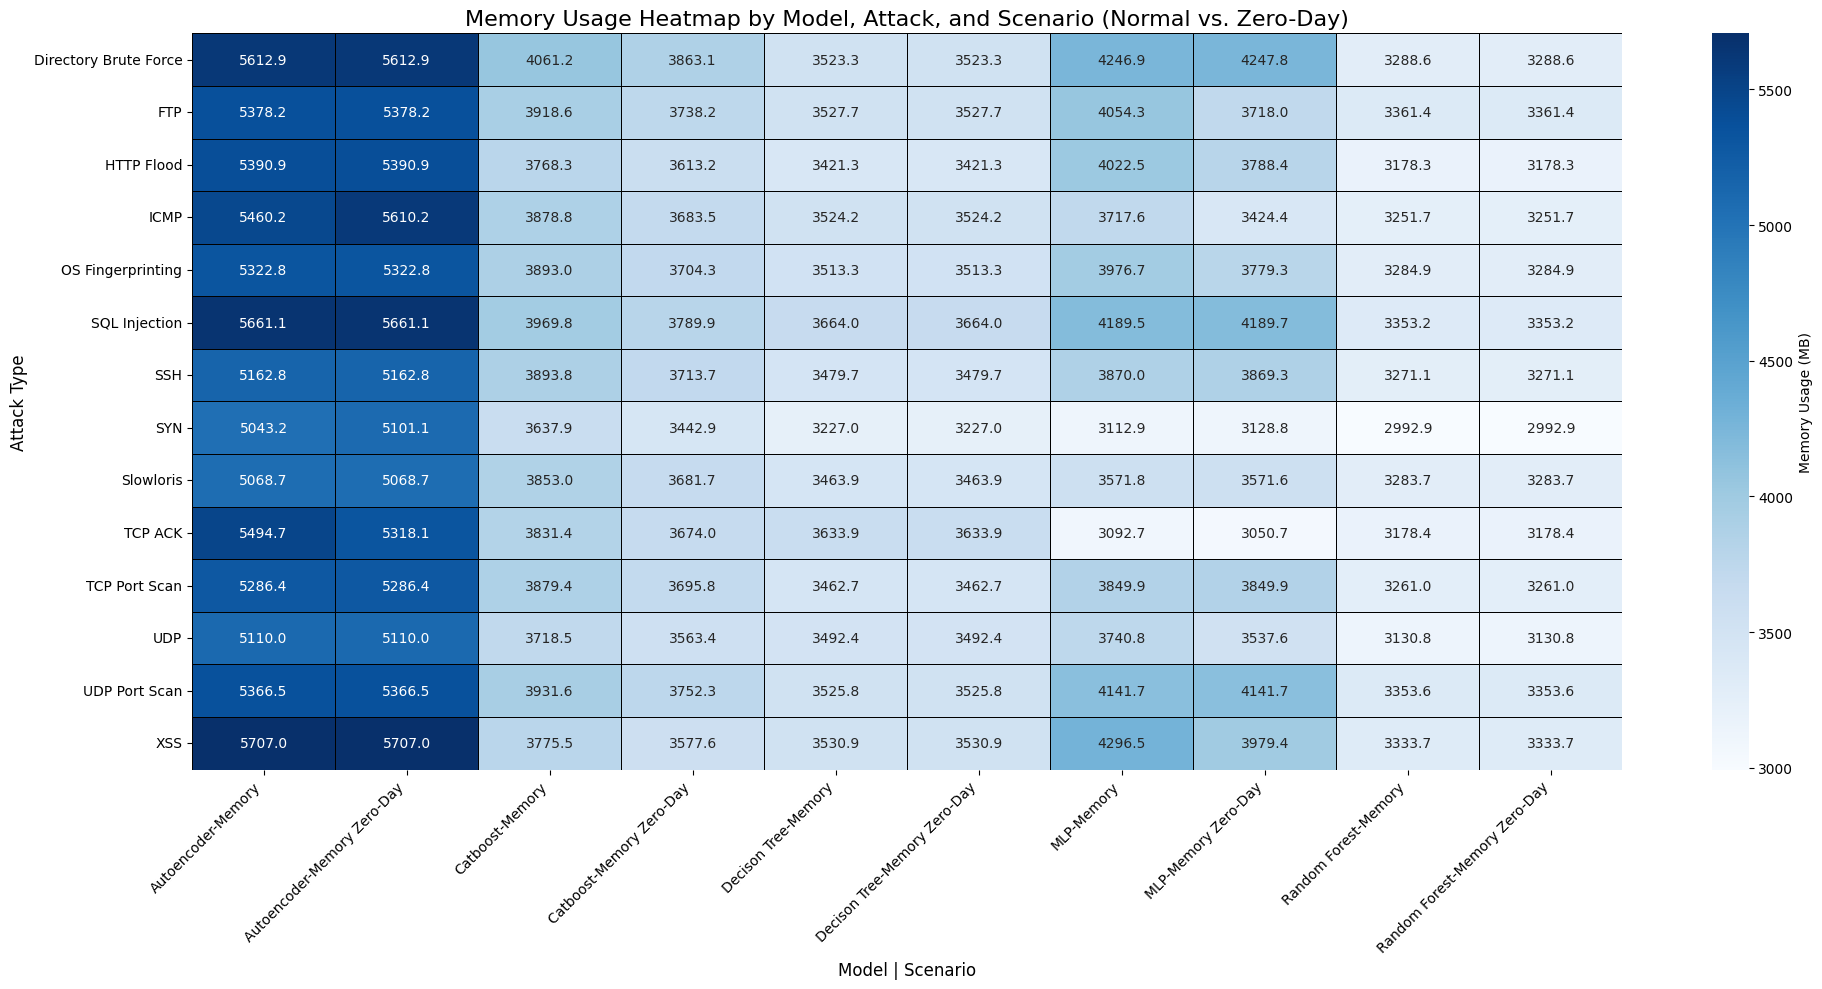

In [101]:
data_memory_heatmap = df[['Modelo', 'Ataque Zero-Day', 'Memory', 'ZD - Memory']]

data_memory_heatmap = data_memory_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Memory': 'Memory Zero-Day'
})

df_melted_memory = data_memory_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Memory', 'Memory Zero-Day'],
    var_name='Scenario',
    value_name='Memory Usage (MB)'
)

df_pivot_memory = df_melted_memory.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Memory Usage (MB)'
)

plt.figure(figsize=(20, 10))

sns.heatmap(
    df_pivot_memory,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Memory Usage (MB)'}
)

plt.title('Memory Usage Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Energy

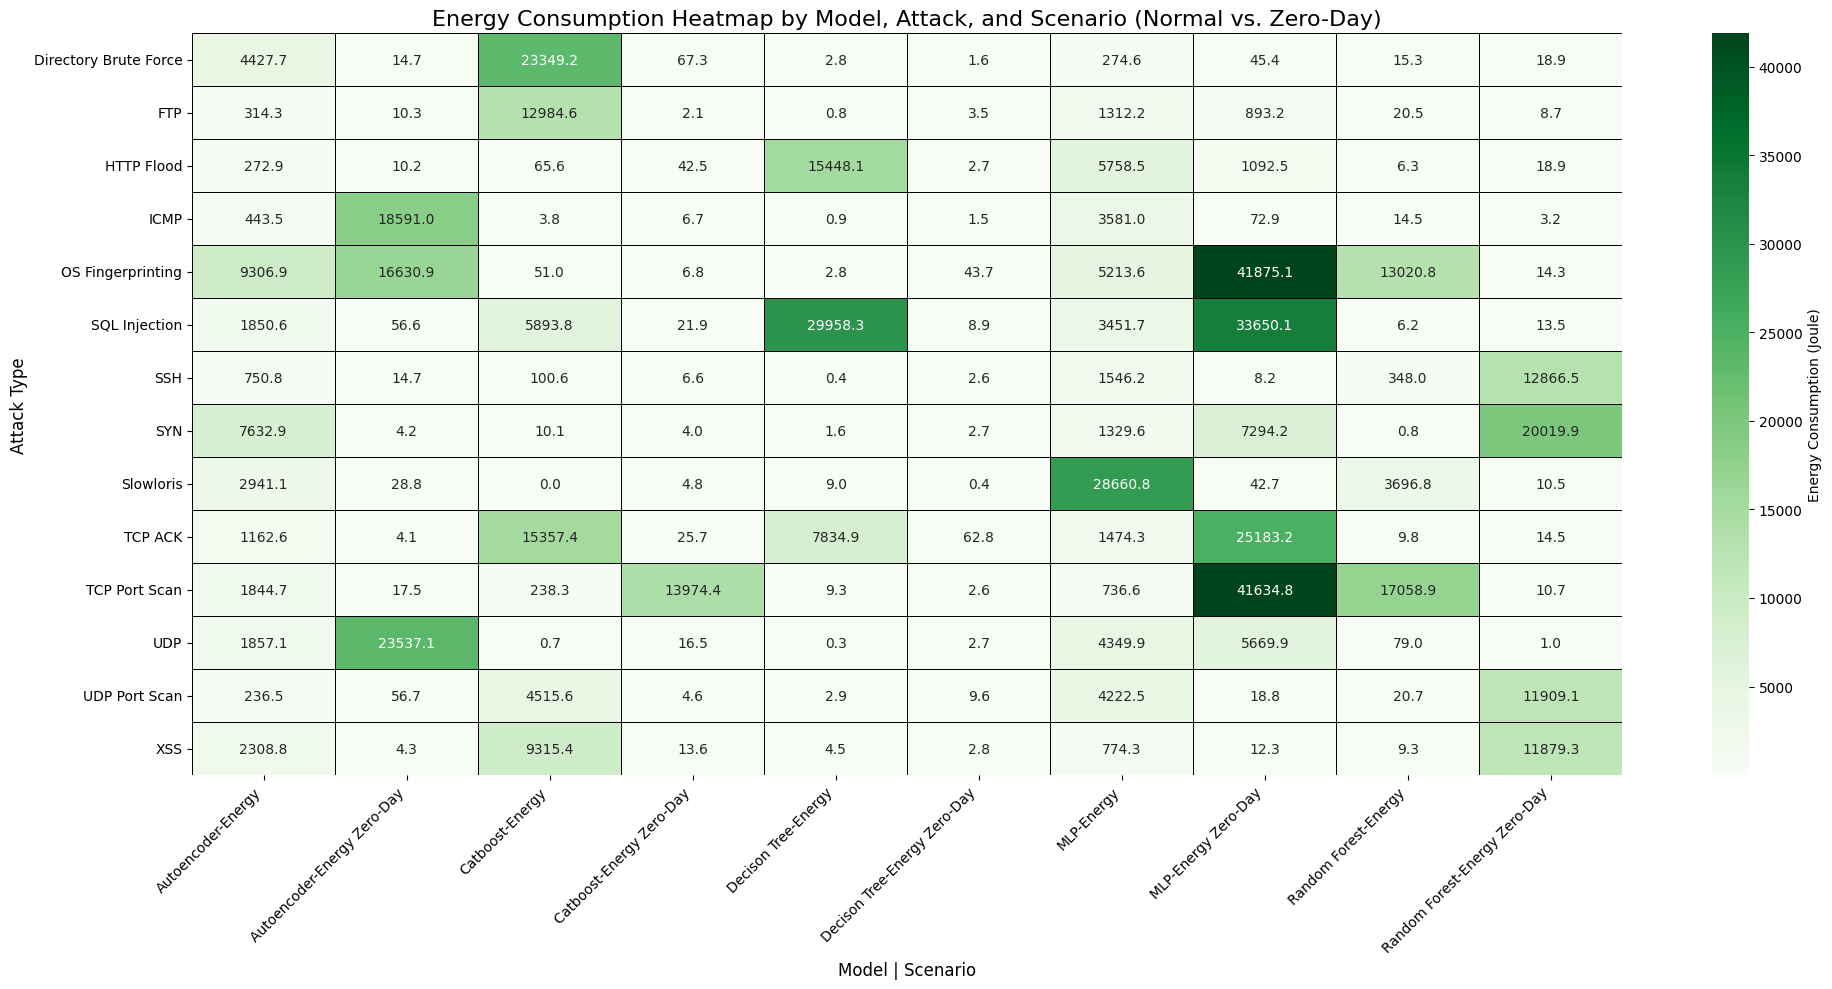

In [102]:
data_energy_heatmap = df[['Modelo', 'Ataque Zero-Day', 'Energy', 'ZD - Energy']]

data_energy_heatmap = data_energy_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Energy': 'Energy Zero-Day'
})

df_melted_energy = data_energy_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Energy', 'Energy Zero-Day'],
    var_name='Scenario',
    value_name='Energy Consumption'
)

df_pivot_energy = df_melted_energy.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Energy Consumption'
)

plt.figure(figsize=(20, 10))

sns.heatmap(
    df_pivot_energy,
    annot=True,
    fmt=".1f",
    cmap="Greens",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Energy Consumption (Joule)'}
)

plt.title('Energy Consumption Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Time


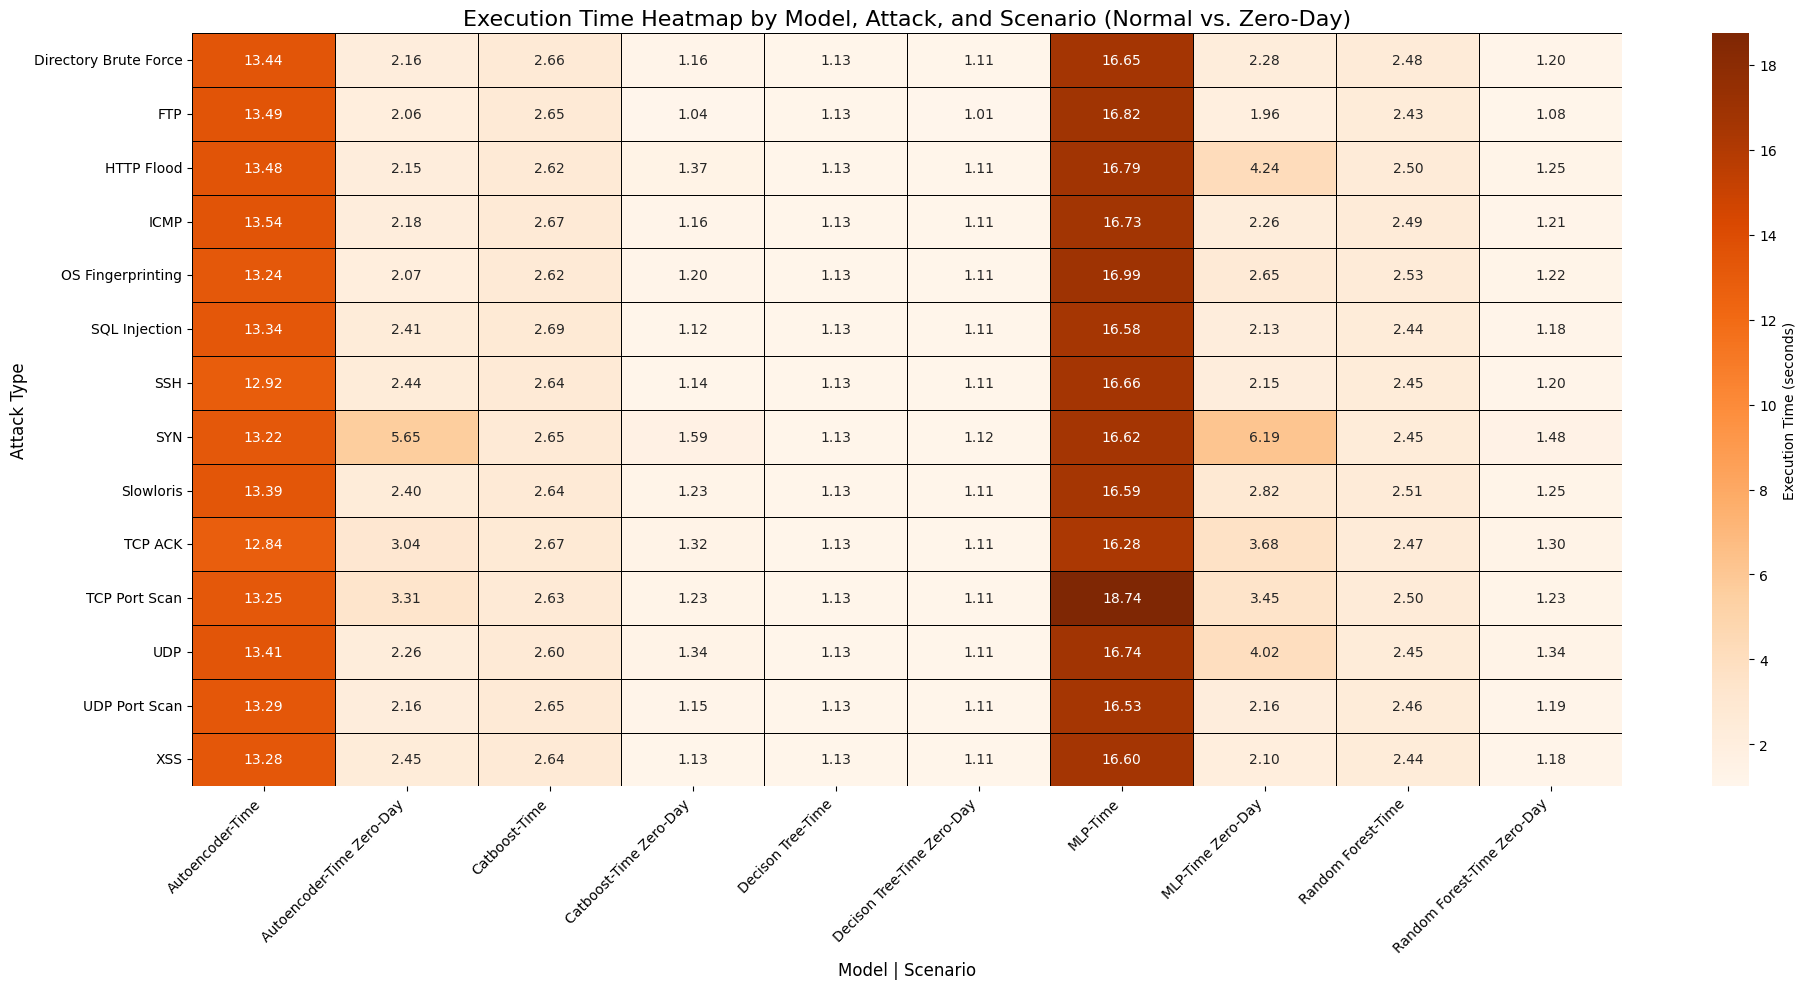

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_time_heatmap = df[['Modelo', 'Ataque Zero-Day', 'Time', 'ZD - Time']]

data_time_heatmap = data_time_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Time': 'Time Zero-Day'
})

df_melted_time = data_time_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Time', 'Time Zero-Day'],
    var_name='Scenario',
    value_name='Execution Time (s)'
)

df_pivot_time = df_melted_time.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Execution Time (s)'
)

plt.figure(figsize=(20, 10))

sns.heatmap(
    df_pivot_time,
    annot=True,
    fmt=".2f",
    cmap="Oranges",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Execution Time (seconds)'}
)

plt.title('Execution Time Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Barplot

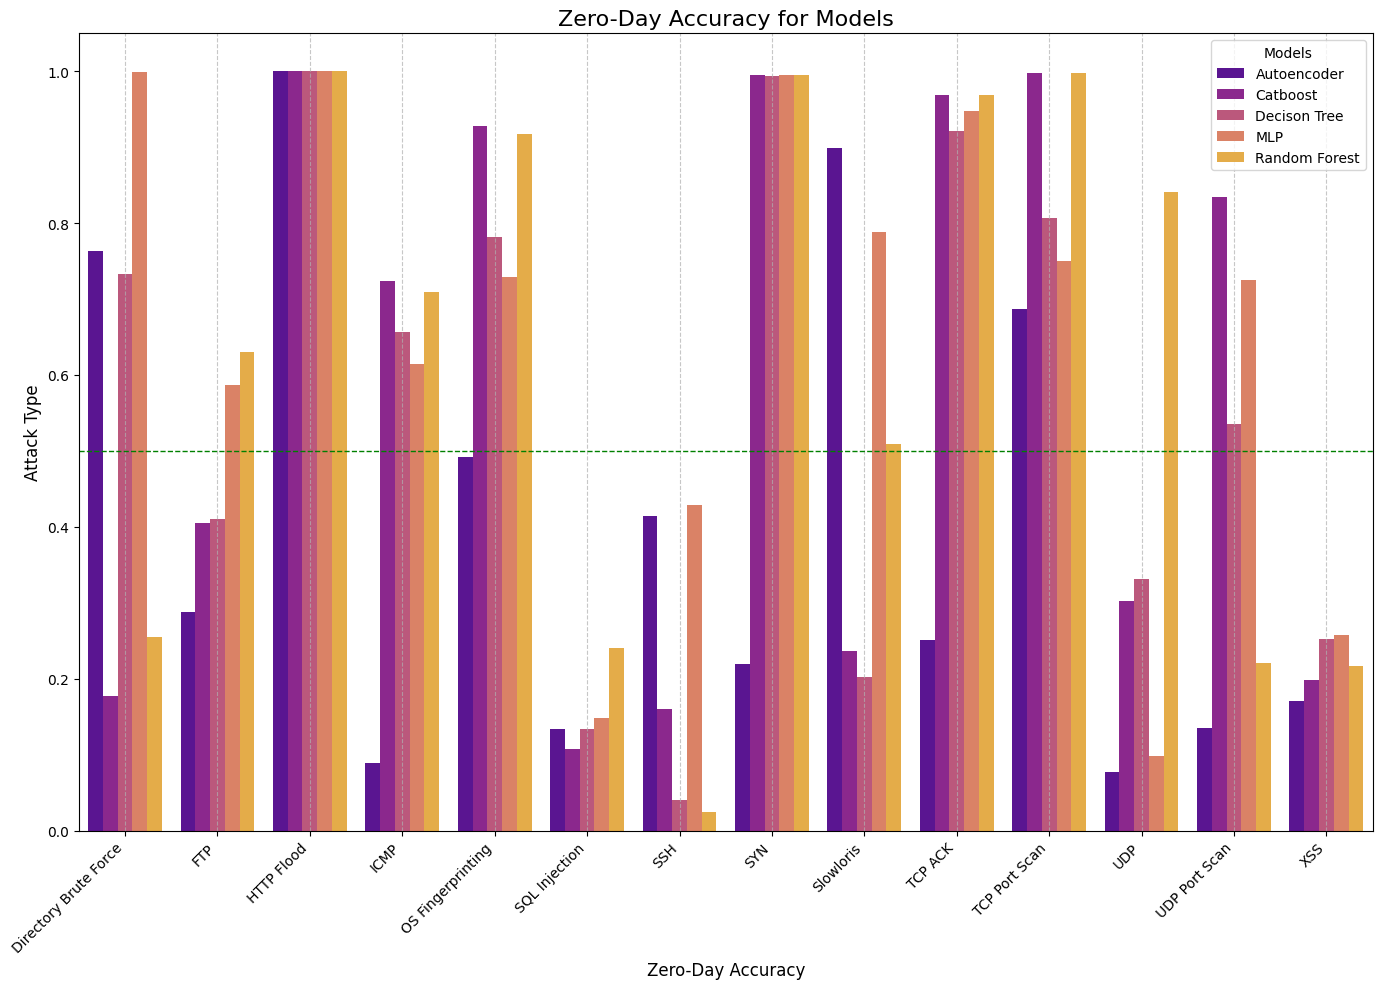

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_accuracy_zd = df[['Modelo', 'Ataque Zero-Day', 'ZD - Accuracy']]

df_plot = df_accuracy_zd.groupby(['Ataque Zero-Day', 'Modelo'])['ZD - Accuracy'].mean().reset_index()

plt.figure(figsize=(14, 10))

sns.barplot(
    x='Ataque Zero-Day',
    y='ZD - Accuracy',
    hue='Modelo',
    data=df_plot,
    palette='plasma'
)

plt.xticks(
    rotation=45,
    ha='right',
    fontsize=10 # <--- AQUI: Fonte dos nomes dos ataques
)

plt.title('Zero-Day Accuracy for Models', fontsize=16)
plt.xlabel('Zero-Day Accuracy', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.axhline(y=0.5, color='green', linestyle='--', linewidth=1)

plt.legend(title='Models', loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()